In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('modelling.csv')

In [4]:
df = df.drop('Unnamed: 0', axis=1)

In [5]:
df

,checking_hour,hour,minute,day_of_week,room,status
0,6,12,0,Monday,436,Unavailable
1,6,12,15,Monday,436,Unavailable
2,6,15,0,Monday,436,Unavailable
3,6,11,30,Monday,436,Unavailable
4,6,12,30,Monday,436,Unavailable
...,...,...,...,...,...,...
18412,12,21,0,Sunday,520D,Available
18413,12,21,15,Sunday,520D,Available
18414,12,21,30,Sunday,520D,Available
18415,12,19,15,Sunday,520D,Available


In [6]:
df.checking_hour.value_counts()

6     8673
12    6048
16    3696
Name: checking_hour, dtype: int64

In [7]:
df.room.value_counts()

436     877
442     877
441     877
514A    877
520C    877
520D    877
514C    877
514D    877
520B    877
520A    877
356     877
358     877
257     877
258     877
305     877
306     877
438     877
440     877
357     877
437     877
514B    877
Name: room, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18417 entries, 0 to 18416
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   checking_hour  18417 non-null  int64 
 1   hour           18417 non-null  int64 
 2   minute         18417 non-null  int64 
 3   day_of_week    18417 non-null  object
 4   room           18417 non-null  object
 5   status         18417 non-null  object
dtypes: int64(3), object(3)
memory usage: 863.4+ KB


In [9]:
df['status'] = df['status'].apply(lambda x: 0 if x=='Unavailable' else 1)

In [10]:
from sklearn.model_selection import train_test_split
X = df.drop('status', axis=1)
y = df['status'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [11]:
from sklearn.preprocessing import OneHotEncoder
encode = OneHotEncoder(drop = 'first')
encode.fit(X_train)
X_train = encode.transform(X_train)
X_test = encode.transform(X_test)

In [12]:
encode.get_feature_names_out()

array(['checking_hour_12', 'checking_hour_16', 'hour_7', 'hour_8',
       'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14',
       'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20',
       'hour_21', 'hour_22', 'hour_23', 'minute_15', 'minute_30',
       'minute_45', 'day_of_week_Monday', 'day_of_week_Saturday',
       'day_of_week_Sunday', 'day_of_week_Thursday',
       'day_of_week_Tuesday', 'day_of_week_Wednesday', 'room_258',
       'room_305', 'room_306', 'room_356', 'room_357', 'room_358',
       'room_436', 'room_437', 'room_438', 'room_440', 'room_441',
       'room_442', 'room_514A', 'room_514B', 'room_514C', 'room_514D',
       'room_520A', 'room_520B', 'room_520C', 'room_520D'], dtype=object)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
rdc = RandomForestClassifier()
rdc.fit(X_train, y_train)
predictions = rdc.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[2585  176]
 [ 286 1558]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      2761
           1       0.90      0.84      0.87      1844

    accuracy                           0.90      4605
   macro avg       0.90      0.89      0.89      4605
weighted avg       0.90      0.90      0.90      4605



In [16]:
feature_importance = pd.DataFrame({
    'features': encode.get_feature_names_out(),
    'values': rdc.feature_importances_ }).sort_values(by='values', ascending=False)

In [17]:
feature_importance_15 = feature_importance.head(15).sort_values(by='values', ascending=True)

<AxesSubplot:ylabel='features'>

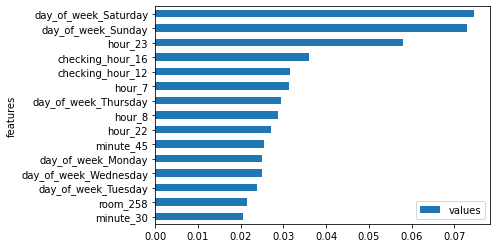

In [18]:
feature_importance_15.plot(kind='barh', x='features', y='values')

# Train Dirty Models and Feature Engineering

In [66]:
from sklearn.model_selection import train_test_split
X = df.drop('status', axis=1)
y = df['status']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [20]:
num = X_train.drop(['day_of_week', 'room'], axis=1)
cat = X_train[['day_of_week', 'room']]

In [ ]:
# Models Dictionary 
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import xgboost as xgb

model_dict = {
    'Logreg': LogisticRegression(),
    'sgd': SGDClassifier(),
    'naive': GaussianNB(),
    'knn': KNeighborsClassifier(),
    'tree': DecisionTreeClassifier(),
    'rfc': RandomForestClassifier(),
    'adaboost': AdaBoostClassifier(),
    'svm': SVC(),
    'gbc': GradientBoostingClassifier(),
    'quadra': QuadraticDiscriminantAnalysis(),
    'xgb': xgb.XGBClassifier(objective="binary:logistic")
}

In [ ]:
def train_and_score(model_dict, X, y, scoring=None, save_model = False):
    """Train model in a model dictionary, calculate the score and return a datafame.
    Parameters
    --------
    model_dict: dict
        A dictionary with the key containing the name of the model and the values 
        containining the model
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        The training input samples. Internally, its dtype will be converted to `dtype=np.float32`. 
        If a sparse matrix is provided, it will be converted into a sparse `csc_matrix`.
    y : array-like of shape (n_samples,) or (n_samples, n_outputs)
        The target values (class labels in classification, real numbers in regression).
    scoring: default = `neg_mean_squared_error`
        The scoring method
    save_model: default = False
        If True, the model is saved to a pickle file
    Return 
    --------
    score_df: `pd.DataFrame`
        This dataframe containing columns of model, mean score, and standard deviation    
    """
    from sklearn.model_selection import cross_val_score
    score_df = pd.DataFrame(columns=['Model', 'Score', 'Std'])
    for name, model in model_dict.items():
        # Train the model
        model.fit(X, y)
        # Calculate the score
        if scoring == None:
            scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error') 
            scores = np.sqrt(-scores)
        else:
            scores = cross_val_score(model, X, y, scoring=scoring)       
        
        # Add the score to the score_df
        adding_df = pd.DataFrame({'Model': [name], 'Score': [scores.mean()], 'Std':[scores.std()]})
        score_df = pd.concat([score_df, adding_df])  
        # Print information      
        print('{}:'.format(name))
        print("Scores:", scores)
        print("Mean:", scores.mean())
        print("Standard deviation:", scores.std())
        print('---------------------')
        # Save the results
        if save_model == True:
            import pickle
            with open(f'{name}_baseline.pkl','wb') as f:
                pickle.dump(model,f)
        
    # Sort the dataset and reset the index
    score_df = score_df.sort_values(by='Score').reset_index(drop=True)
    # Return the result
    return score_df

# With Polynomial Features

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
num_pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('scale', StandardScaler())
])

cat_pipeline = Pipeline([
    ('encode', OneHotEncoder())
])

from sklearn.compose import ColumnTransformer
num_attribs = list(num)
cat_attribs = ['day_of_week', 'room']
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs)
])

In [22]:
X_train_prepared = full_pipeline.fit_transform(X_train)

In [25]:
score_df_poly = train_and_score(model_dict, X_train_prepared, y_train, scoring='accuracy')

c:\Users\Kha Do\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Kha Do\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Logreg:
Scores: [0.85378212 0.84147666 0.84902245 0.8410572  0.83852281]
Mean: 0.8447722477352142
Standard deviation: 0.005708939638116235
---------------------
sgd:
Scores: [0.84328628 0.83460007 0.82766112 0.83671253 0.82476466]
Mean: 0.8334049321972911
Standard deviation: 0.006597807513904963
---------------------
naive:
Scores: [0.7567861  0.76112921 0.76466329 0.76828385 0.75887038]
Mean: 0.761946566595985
Standard deviation: 0.00410616933827429
---------------------
knn:
Scores: [0.83279045 0.83821933 0.83454019 0.83562636 0.82983345]
Mean: 0.8342019543973942
Standard deviation: 0.0028056643415382073
---------------------
tree:
Scores: [0.91060442 0.91349982 0.90658943 0.9160029  0.90984794]
Mean: 0.9113088990416708
Standard deviation: 0.0032167641742125276
---------------------
rfc:
Scores: [0.90626131 0.90662324 0.90007241 0.89790007 0.90007241]
Mean: 0.9021858881574378
Standard deviation: 0.0035665362054239655
---------------------
adaboost:
Scores: [0.85559175 0.84762939 0.84

c:\Users\Kha Do\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\Kha Do\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\Kha Do\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\Kha Do\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\Kha Do\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\Kha Do\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


xgb:
Scores: [0.91494752 0.91965255 0.91527878 0.9275887  0.91636495]
Mean: 0.9187665025291538
Standard deviation: 0.004714500286679822
---------------------


In [26]:
score_df_poly

,Model,Score,Std
0,naive,0.761947,0.004106
1,quadra,0.827035,0.005266
2,sgd,0.833405,0.006598
3,knn,0.834202,0.002806
4,Logreg,0.844772,0.005709
5,adaboost,0.846147,0.005229
6,gbc,0.860772,0.006006
7,svm,0.865913,0.004235
8,rfc,0.902186,0.003567
9,tree,0.911309,0.003217


<AxesSubplot:ylabel='Model'>

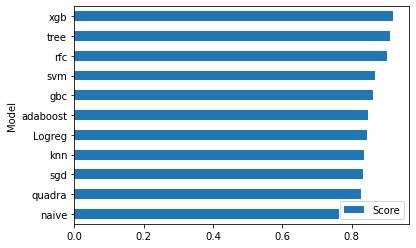

In [27]:
score_df_poly.plot(kind='barh', x='Model', y='Score')

# Without polynomial features

In [28]:
num_pipeline = Pipeline([
    # ('poly', PolynomialFeatures()),
    ('scale', StandardScaler())
])

cat_pipeline = Pipeline([
    ('encode', OneHotEncoder())
])

from sklearn.compose import ColumnTransformer
num_attribs = list(num)
cat_attribs = ['day_of_week', 'room']
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs)
])

In [29]:
X_train_prepared = full_pipeline.fit_transform(X_train).toarray()

In [30]:
score_df = train_and_score(model_dict, X_train_prepared, y_train, scoring='accuracy')

Logreg:
Scores: [0.71335505 0.70865002 0.70745836 0.70999276 0.70745836]
Mean: 0.7093829105672008
Standard deviation: 0.0021952080418471743
---------------------
sgd:
Scores: [0.71950778 0.71045965 0.70637219 0.71578566 0.70456191]
Mean: 0.7113374389987899
Standard deviation: 0.00561913049433872
---------------------
naive:
Scores: [0.72891784 0.74665219 0.73678494 0.74692252 0.73062998]
Mean: 0.7379814938426812
Standard deviation: 0.007651786808984747
---------------------
knn:
Scores: [0.86608759 0.86681144 0.85590152 0.86133237 0.86350471]
Mean: 0.8627275236044316
Standard deviation: 0.0039271657991489795
---------------------
tree:
Scores: [0.91965255 0.92073833 0.91708907 0.92831282 0.9192614 ]
Mean: 0.9210108333903346
Standard deviation: 0.00383872143289222
---------------------
rfc:
Scores: [0.92435758 0.92833876 0.92795076 0.92867487 0.93193338]
Mean: 0.9282510719518788
Standard deviation: 0.002408159047838222
---------------------
adaboost:
Scores: [0.8577633  0.84183858 0.845

c:\Users\Kha Do\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\Kha Do\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\Kha Do\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\Kha Do\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\Kha Do\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\Kha Do\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


xgb:
Scores: [0.91929063 0.92761491 0.91708907 0.92686459 0.91310644]
Mean: 0.9207931277670196
Standard deviation: 0.005629601740681039
---------------------


In [31]:
score_df

,Model,Score,Std
0,Logreg,0.709383,0.002195
1,sgd,0.711337,0.005619
2,quadra,0.723069,0.017235
3,naive,0.737981,0.007652
4,adaboost,0.844700,0.007150
5,gbc,0.861569,0.006524
6,knn,0.862728,0.003927
7,svm,0.887706,0.004344
8,xgb,0.920793,0.005630
9,tree,0.921011,0.003839


<AxesSubplot:ylabel='Model'>

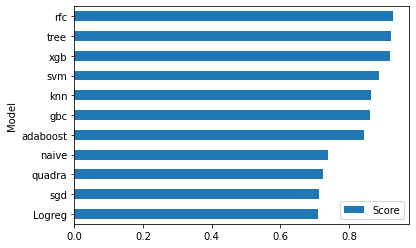

In [32]:
score_df.plot(kind='barh', x='Model', y='Score')

The 3 most promising models are rfc, xgb, and tree. Polynomial features do not work

# With Floors

In [102]:
from sklearn.base import BaseEstimator, TransformerMixin
class AddFloors(BaseEstimator, TransformerMixin):
    # def __init__(self, add_floors = True):
    #     self.add_floors = add_floors
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X['room'] = X['room'].astype(str)
        X['floor'] = X['room'].apply(lambda x: list(x)[0])
        return X.astype(str)

In [103]:
num_pipeline = Pipeline([
    # ('poly', PolynomialFeatures()),
    ('scale', StandardScaler())
])

cat_pipeline = Pipeline([
    ('floors', AddFloors()),
    ('encode', OneHotEncoder(drop='first'))
])

from sklearn.compose import ColumnTransformer
num_attribs = list(num)
cat_attribs = ['day_of_week', 'room']
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs)
])

In [104]:
X_train_prepared = full_pipeline.fit_transform(X_train).toarray()

In [105]:
score_df_floor = train_and_score(model_dict, X_train_prepared, y_train, scoring='accuracy')

Logreg:
Scores: [0.71299312 0.70285921 0.71542361 0.70926865 0.71433744]
Mean: 0.7109764046101071
Standard deviation: 0.004559529884373029
---------------------
sgd:
Scores: [0.70466884 0.70647847 0.71469949 0.70347574 0.71542361]
Mean: 0.7089492290149417
Standard deviation: 0.005086621107735262
---------------------
naive:
Scores: [0.71371697 0.71625045 0.72990587 0.71578566 0.71578566]
Mean: 0.7182889234303614
Standard deviation: 0.005874419998973859
---------------------
knn:
Scores: [0.86391603 0.86210641 0.86097031 0.87219406 0.86314265]
Mean: 0.8644658926546432
Standard deviation: 0.0039890897921284665
---------------------
tree:
Scores: [0.91205212 0.92073833 0.9134685  0.90224475 0.90731354]
Mean: 0.9111634474695751
Standard deviation: 0.0061991335417887275
---------------------
rfc:
Scores: [0.92363373 0.92508143 0.9217958  0.9192614  0.91564084]
Mean: 0.921082641914216
Standard deviation: 0.0033447600070683273
---------------------
adaboost:
Scores: [0.83460007 0.84111473 0.8

c:\Users\Kha Do\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\Kha Do\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\Kha Do\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\Kha Do\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\Kha Do\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\Kha Do\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


xgb:
Scores: [0.91929063 0.92254796 0.91708907 0.90803765 0.91672701]
Mean: 0.9167384620868029
Standard deviation: 0.00481852401416152
---------------------


In [108]:
score_df_floor

,Model,Score,Std
0,sgd,0.708949,0.005087
1,Logreg,0.710976,0.004560
2,quadra,0.717780,0.023295
3,naive,0.718289,0.005874
4,adaboost,0.836519,0.009835
5,gbc,0.853823,0.008733
6,knn,0.864466,0.003989
7,svm,0.874530,0.005898
8,tree,0.911163,0.006199
9,xgb,0.916738,0.004819


<AxesSubplot:ylabel='Model'>

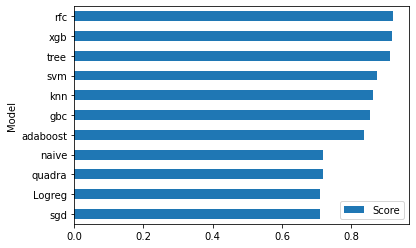

In [109]:
score_df_floor.plot(kind='barh', x='Model', y='Score')

The original dataset performs the best. The three most promising models are Random Forest, Xgboost and Decision Tree.

# Tune Random Forest Classifier using the original dataset

In [114]:
num_pipeline = Pipeline([
    ('scale', StandardScaler())
])

cat_pipeline = Pipeline([
    ('encode', OneHotEncoder())
])

from sklearn.compose import ColumnTransformer
num_attribs = list(num)
cat_attribs = ['day_of_week', 'room']
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs)
])

In [115]:
X_train_prepared = full_pipeline.fit_transform(X_train)

In [117]:
# We will tune the three models
from sklearn.model_selection import GridSearchCV
# Random Forest Classifier
rfc = RandomForestClassifier()
param_grid = [{
    'bootstrap': [True, False],
    'max_depth': [10, 30, 50, 100],
    'max_features': ['log2', 'sqrt'],
    'n_estimators': [10, 50, 100]
}]
grid_search = GridSearchCV(rfc, param_grid, cv = 5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train_prepared, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'bootstrap': [True, False],
                          'max_depth': [10, 30, 50, 100],
                          'max_features': ['log2', 'sqrt'],
                          'n_estimators': [10, 50, 100]}],
             return_train_score=True, scoring='accuracy')

In [118]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [119]:
X_test_prepared = full_pipeline.transform(X_test)

In [120]:
from sklearn.metrics import confusion_matrix, classification_report
predictions = grid_search.predict(X_test_prepared)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[2640   74]
 [ 196 1695]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2714
           1       0.96      0.90      0.93      1891

    accuracy                           0.94      4605
   macro avg       0.94      0.93      0.94      4605
weighted avg       0.94      0.94      0.94      4605



In [121]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.9413680781758957
